In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!mkdir DriveSafe-YOLOv8

mkdir: cannot create directory ‘DriveSafe-YOLOv8’: File exists


In [ ]:
%cd DriveSafe-YOLOv8

/content/gdrive/MyDrive/DriveSafe-YOLOv8


In [ ]:
%cd ..

/content/gdrive/MyDrive/DriveSafe-YOLOv8


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive/DriveSafe-YOLOv8


## Install YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="hmsePbyzzAi1DjP9xLZI")
project = rf.workspace("damian-lab").project("drivesafe")
dataset = project.version(8).download("yolov8")

mkdir: cannot create directory ‘/content/gdrive/MyDrive/DriveSafe-YOLOv8/datasets’: File exists
/content/gdrive/MyDrive/DriveSafe-YOLOv8/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to DriveSafe-8 in yolov8:: 100%|██████████| 3744/3744 [00:14<00:00, 252.68it/s]


In [ ]:
!cat {dataset.location}/data.yaml

names:
- Eye_Closed
- Eye_Open
- Facing_Front
- Mouth_Yawning
nc: 4
roboflow:
  license: MIT
  project: drivesafe
  url: https://universe.roboflow.com/damian-lab/drivesafe/dataset/8
  version: 8
  workspace: damian-lab
test: ../test/images
train: DriveSafe-8/train/images
val: DriveSafe-8/valid/images


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml plots=True

/content/gdrive/MyDrive/DriveSafe-YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/gdrive/MyDrive/DriveSafe-YOLOv8/datasets/DriveSafe-8/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

In [ ]:
!ls {HOME}/runs/detect/train14/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch9180.jpg
events.out.tfevents.1685574535.0054e9b1bcc6.5693.0  train_batch9181.jpg
F1_curve.png					    train_batch9182.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content/gdrive/MyDrive/DriveSafe-YOLOv8


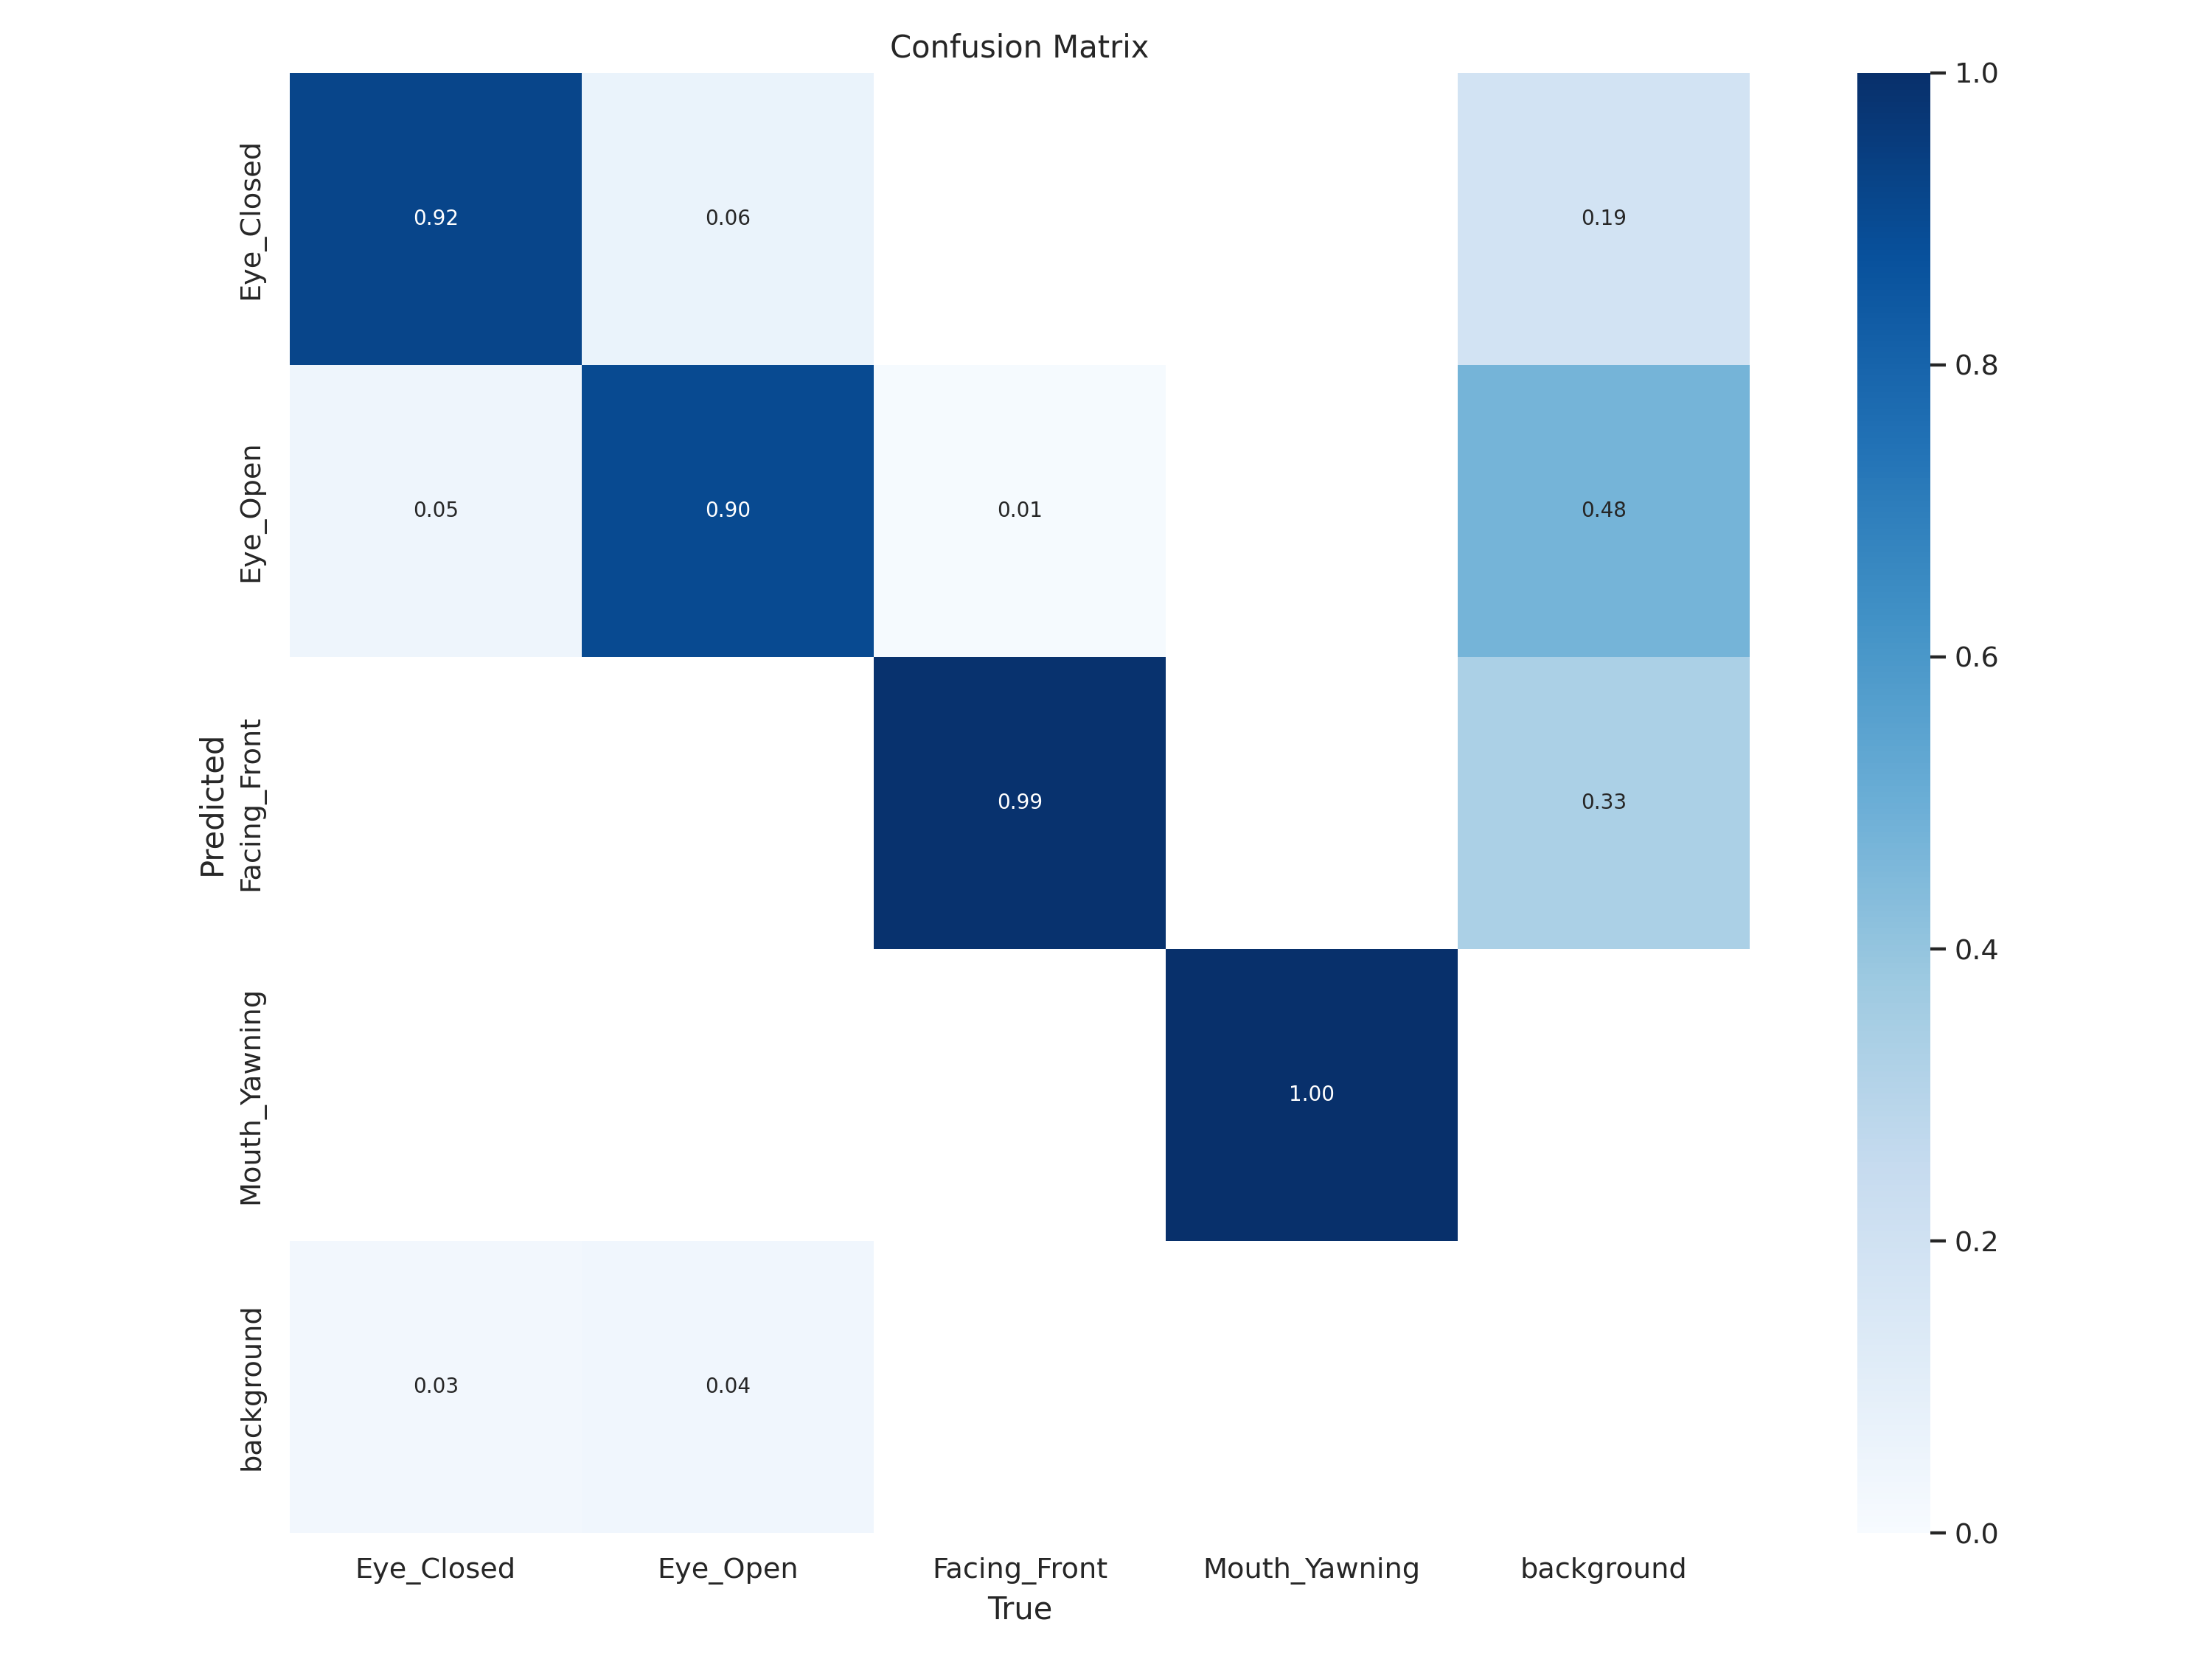

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/confusion_matrix.png', width=600)

/content/gdrive/MyDrive/DriveSafe-YOLOv8


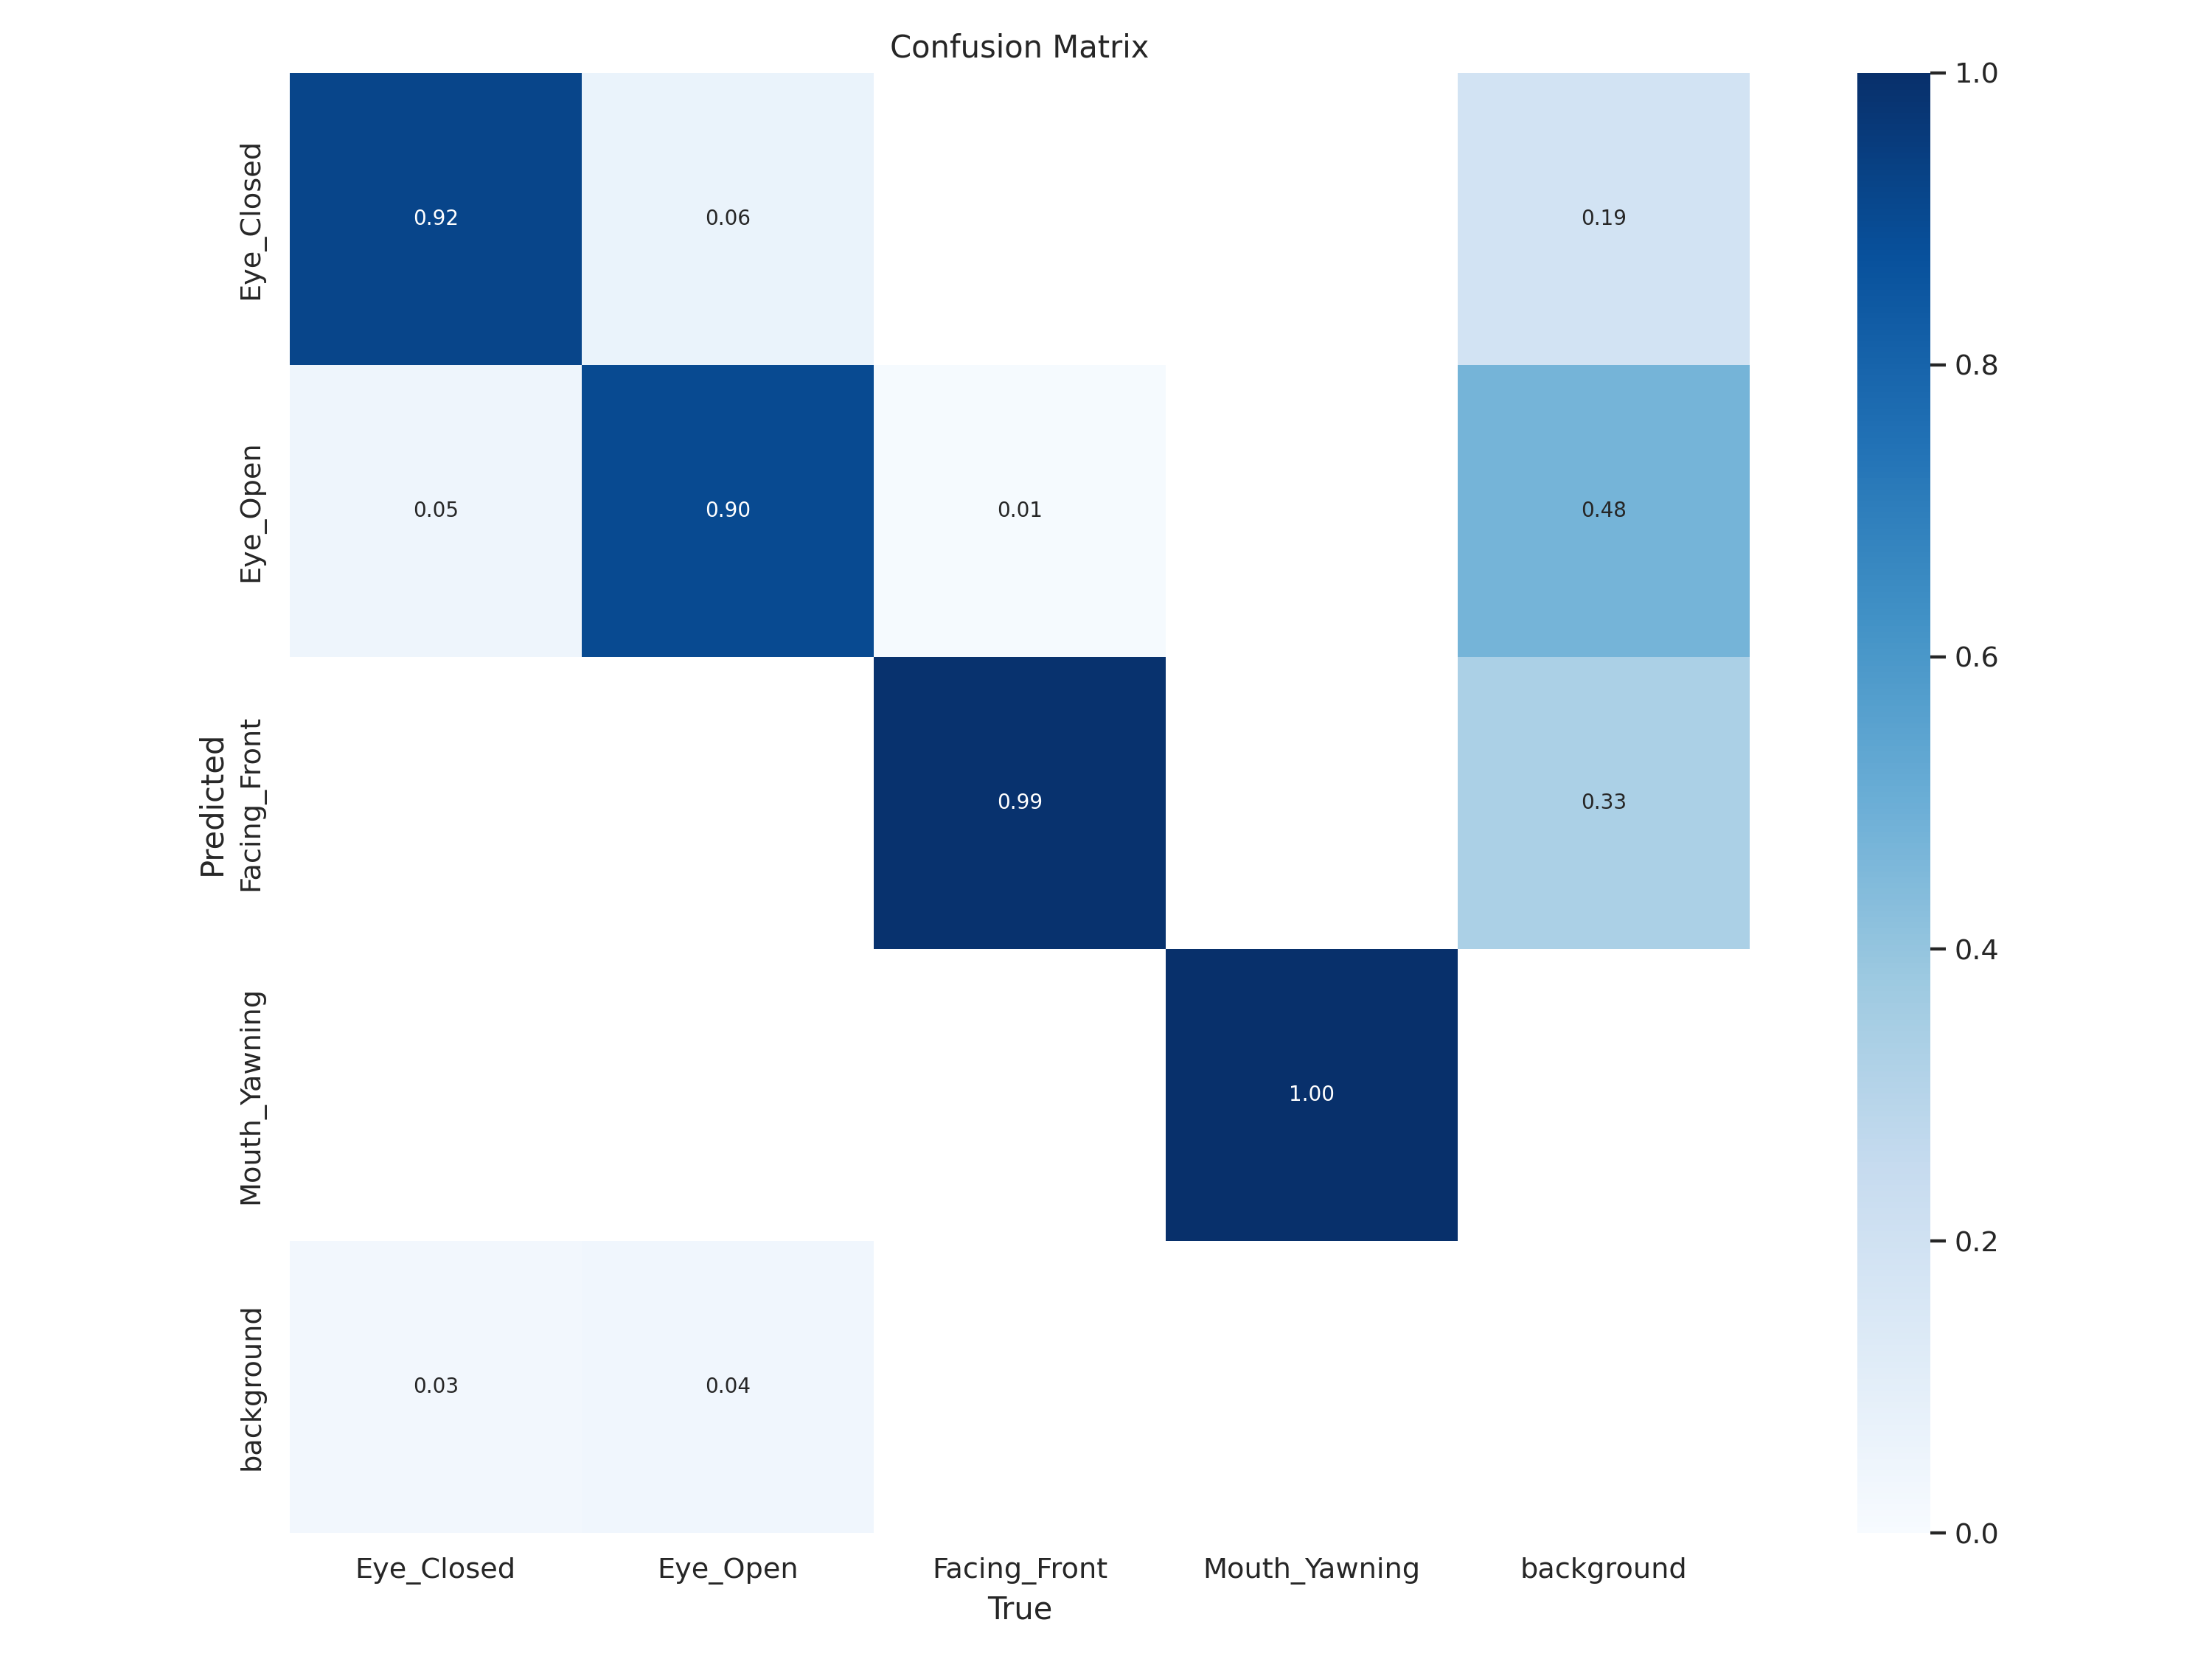

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/confusion_matrix.png', width=600)

/content/gdrive/MyDrive/DriveSafe-YOLOv8


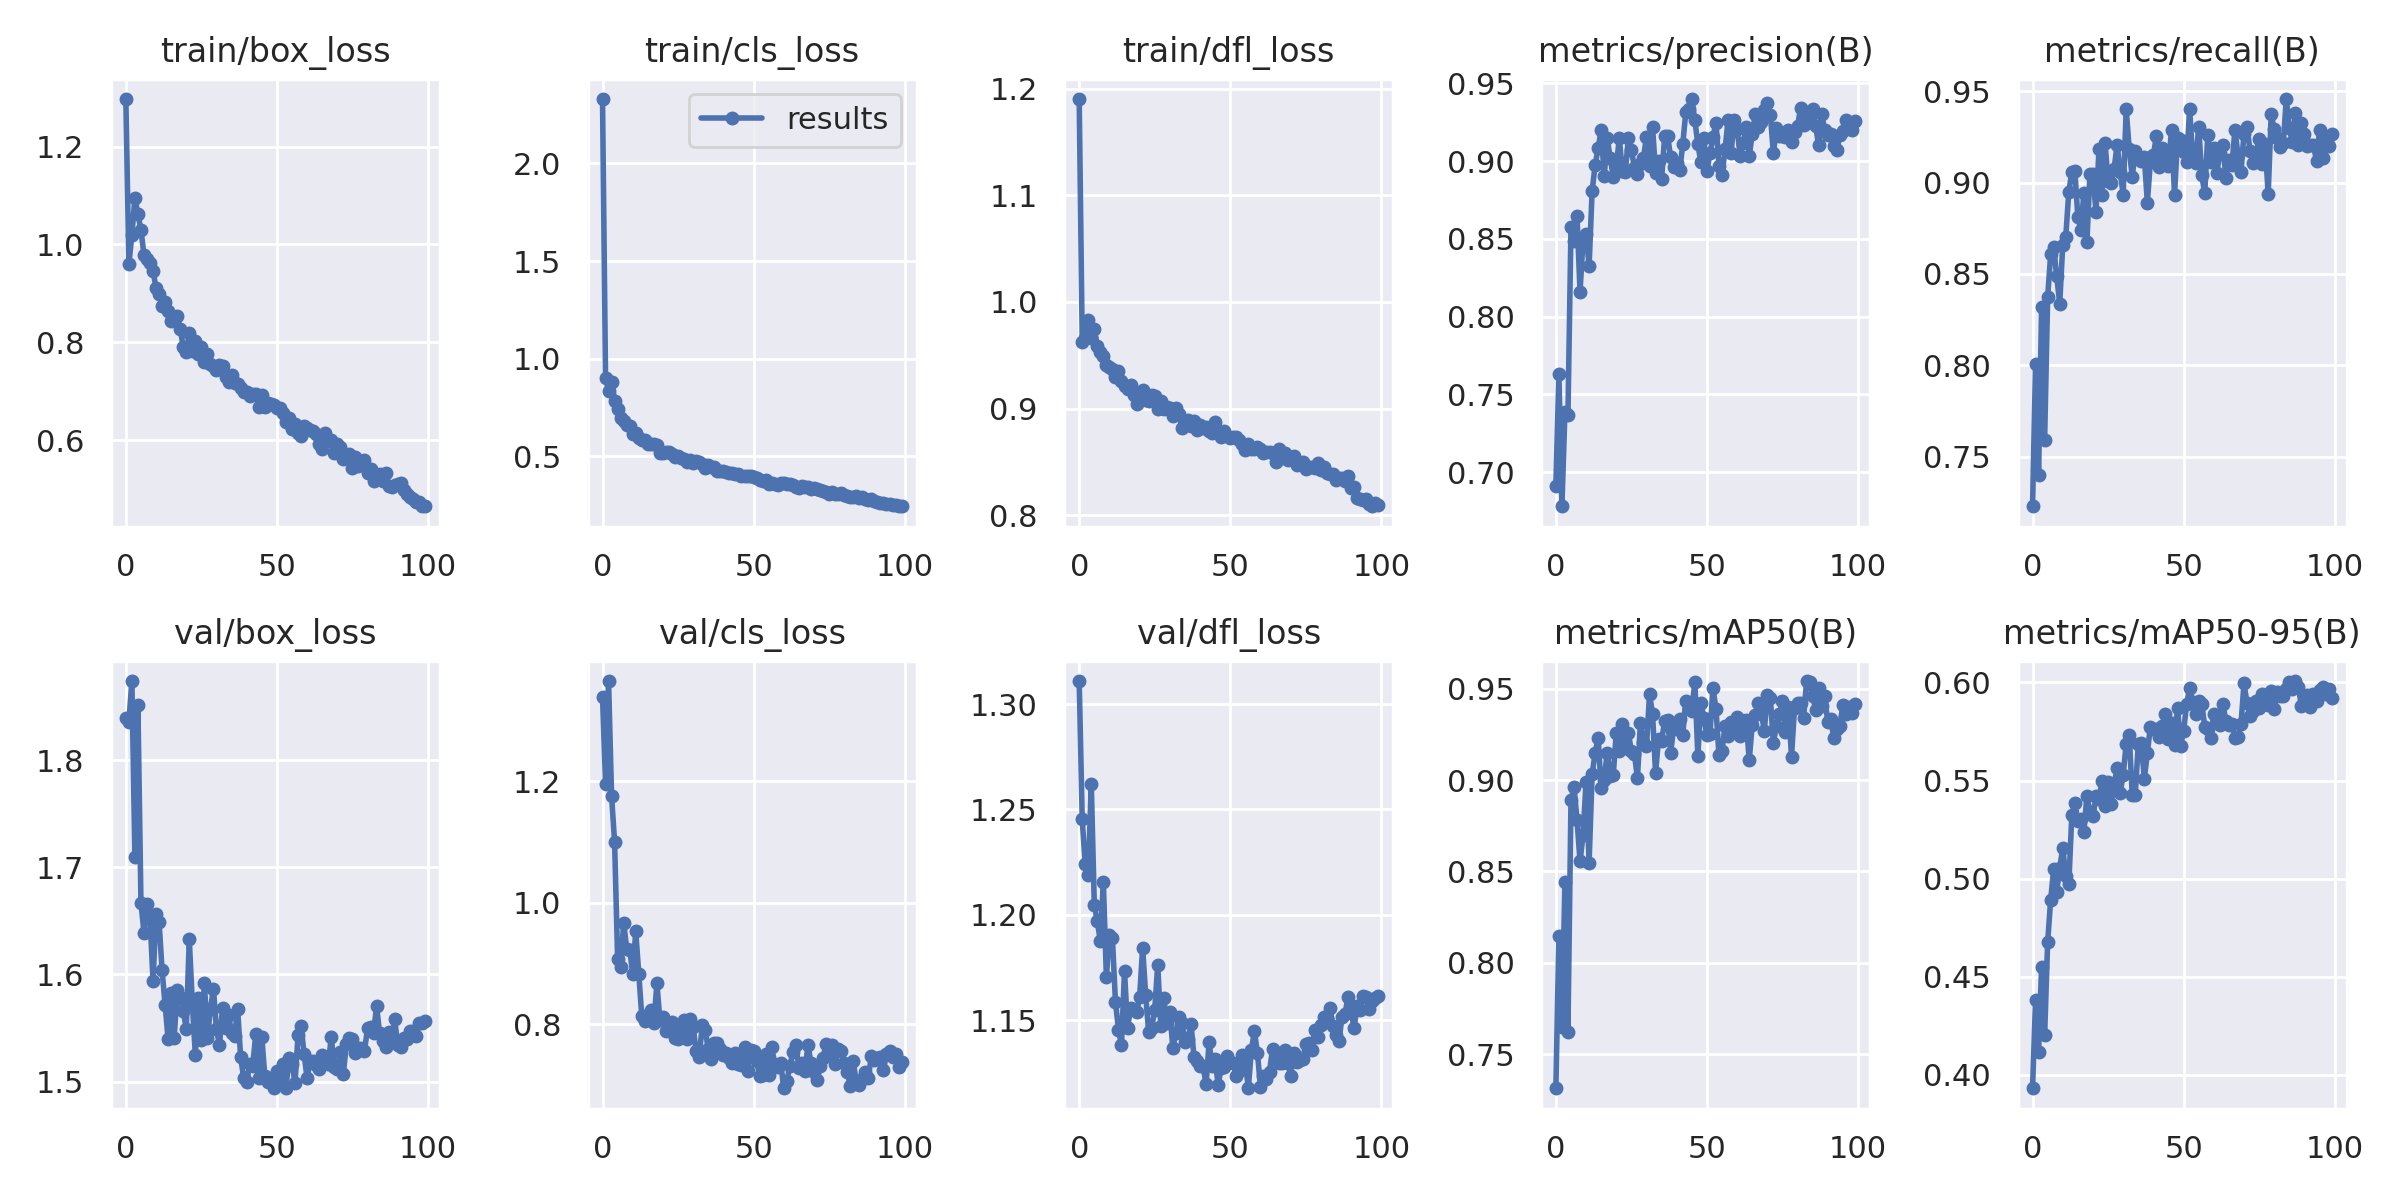

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/results.png', width=600)

/content/gdrive/MyDrive/DriveSafe-YOLOv8


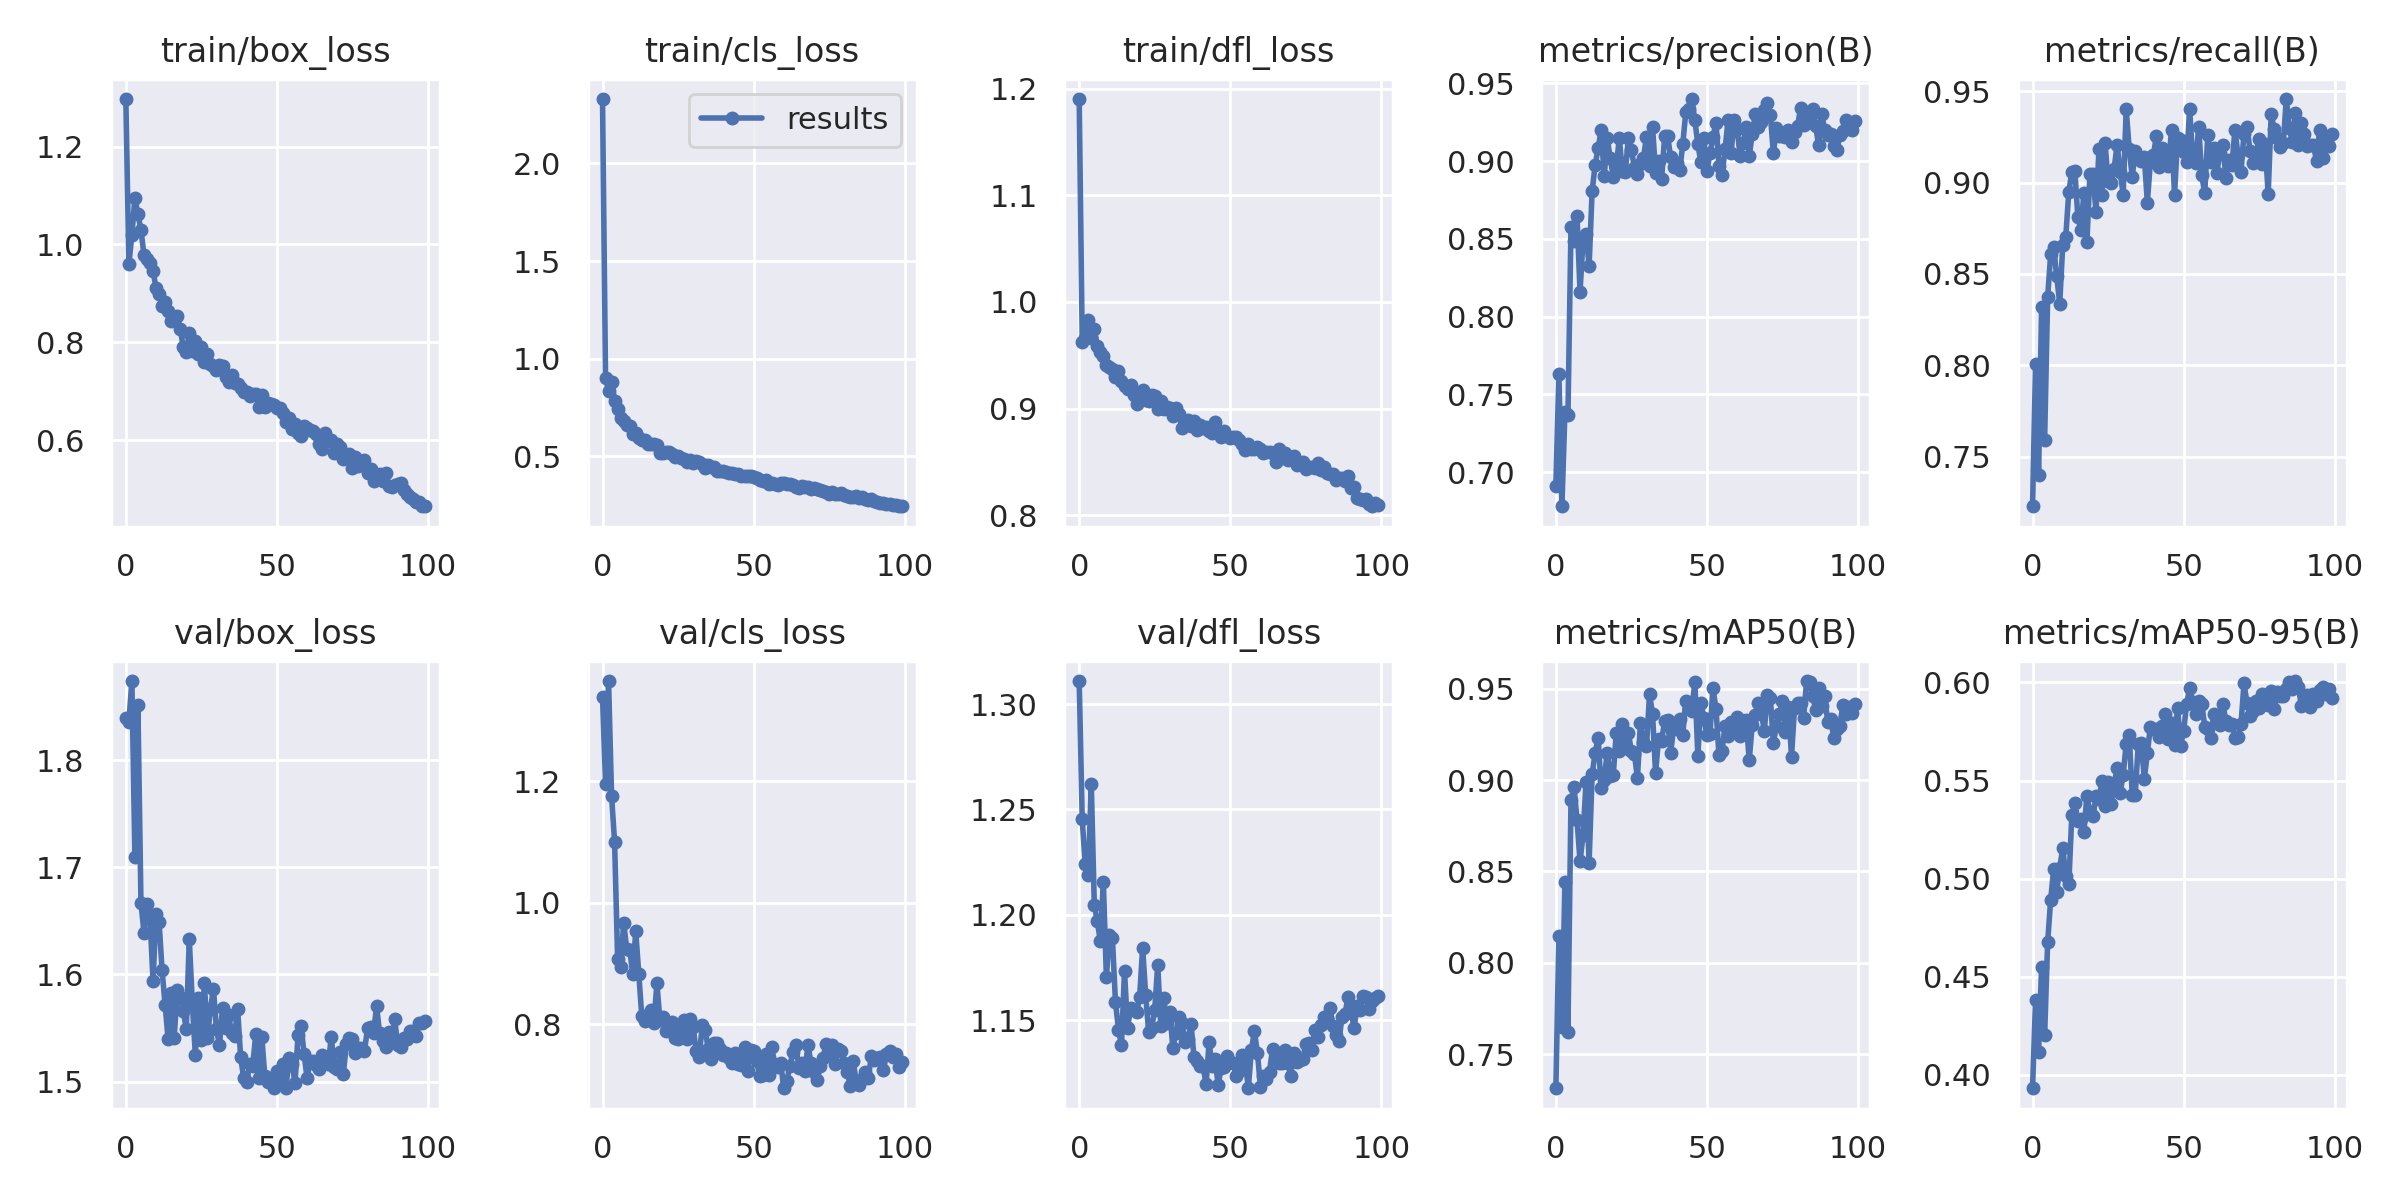

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/results.png', width=600)

/content/gdrive/MyDrive/DriveSafe-YOLOv8


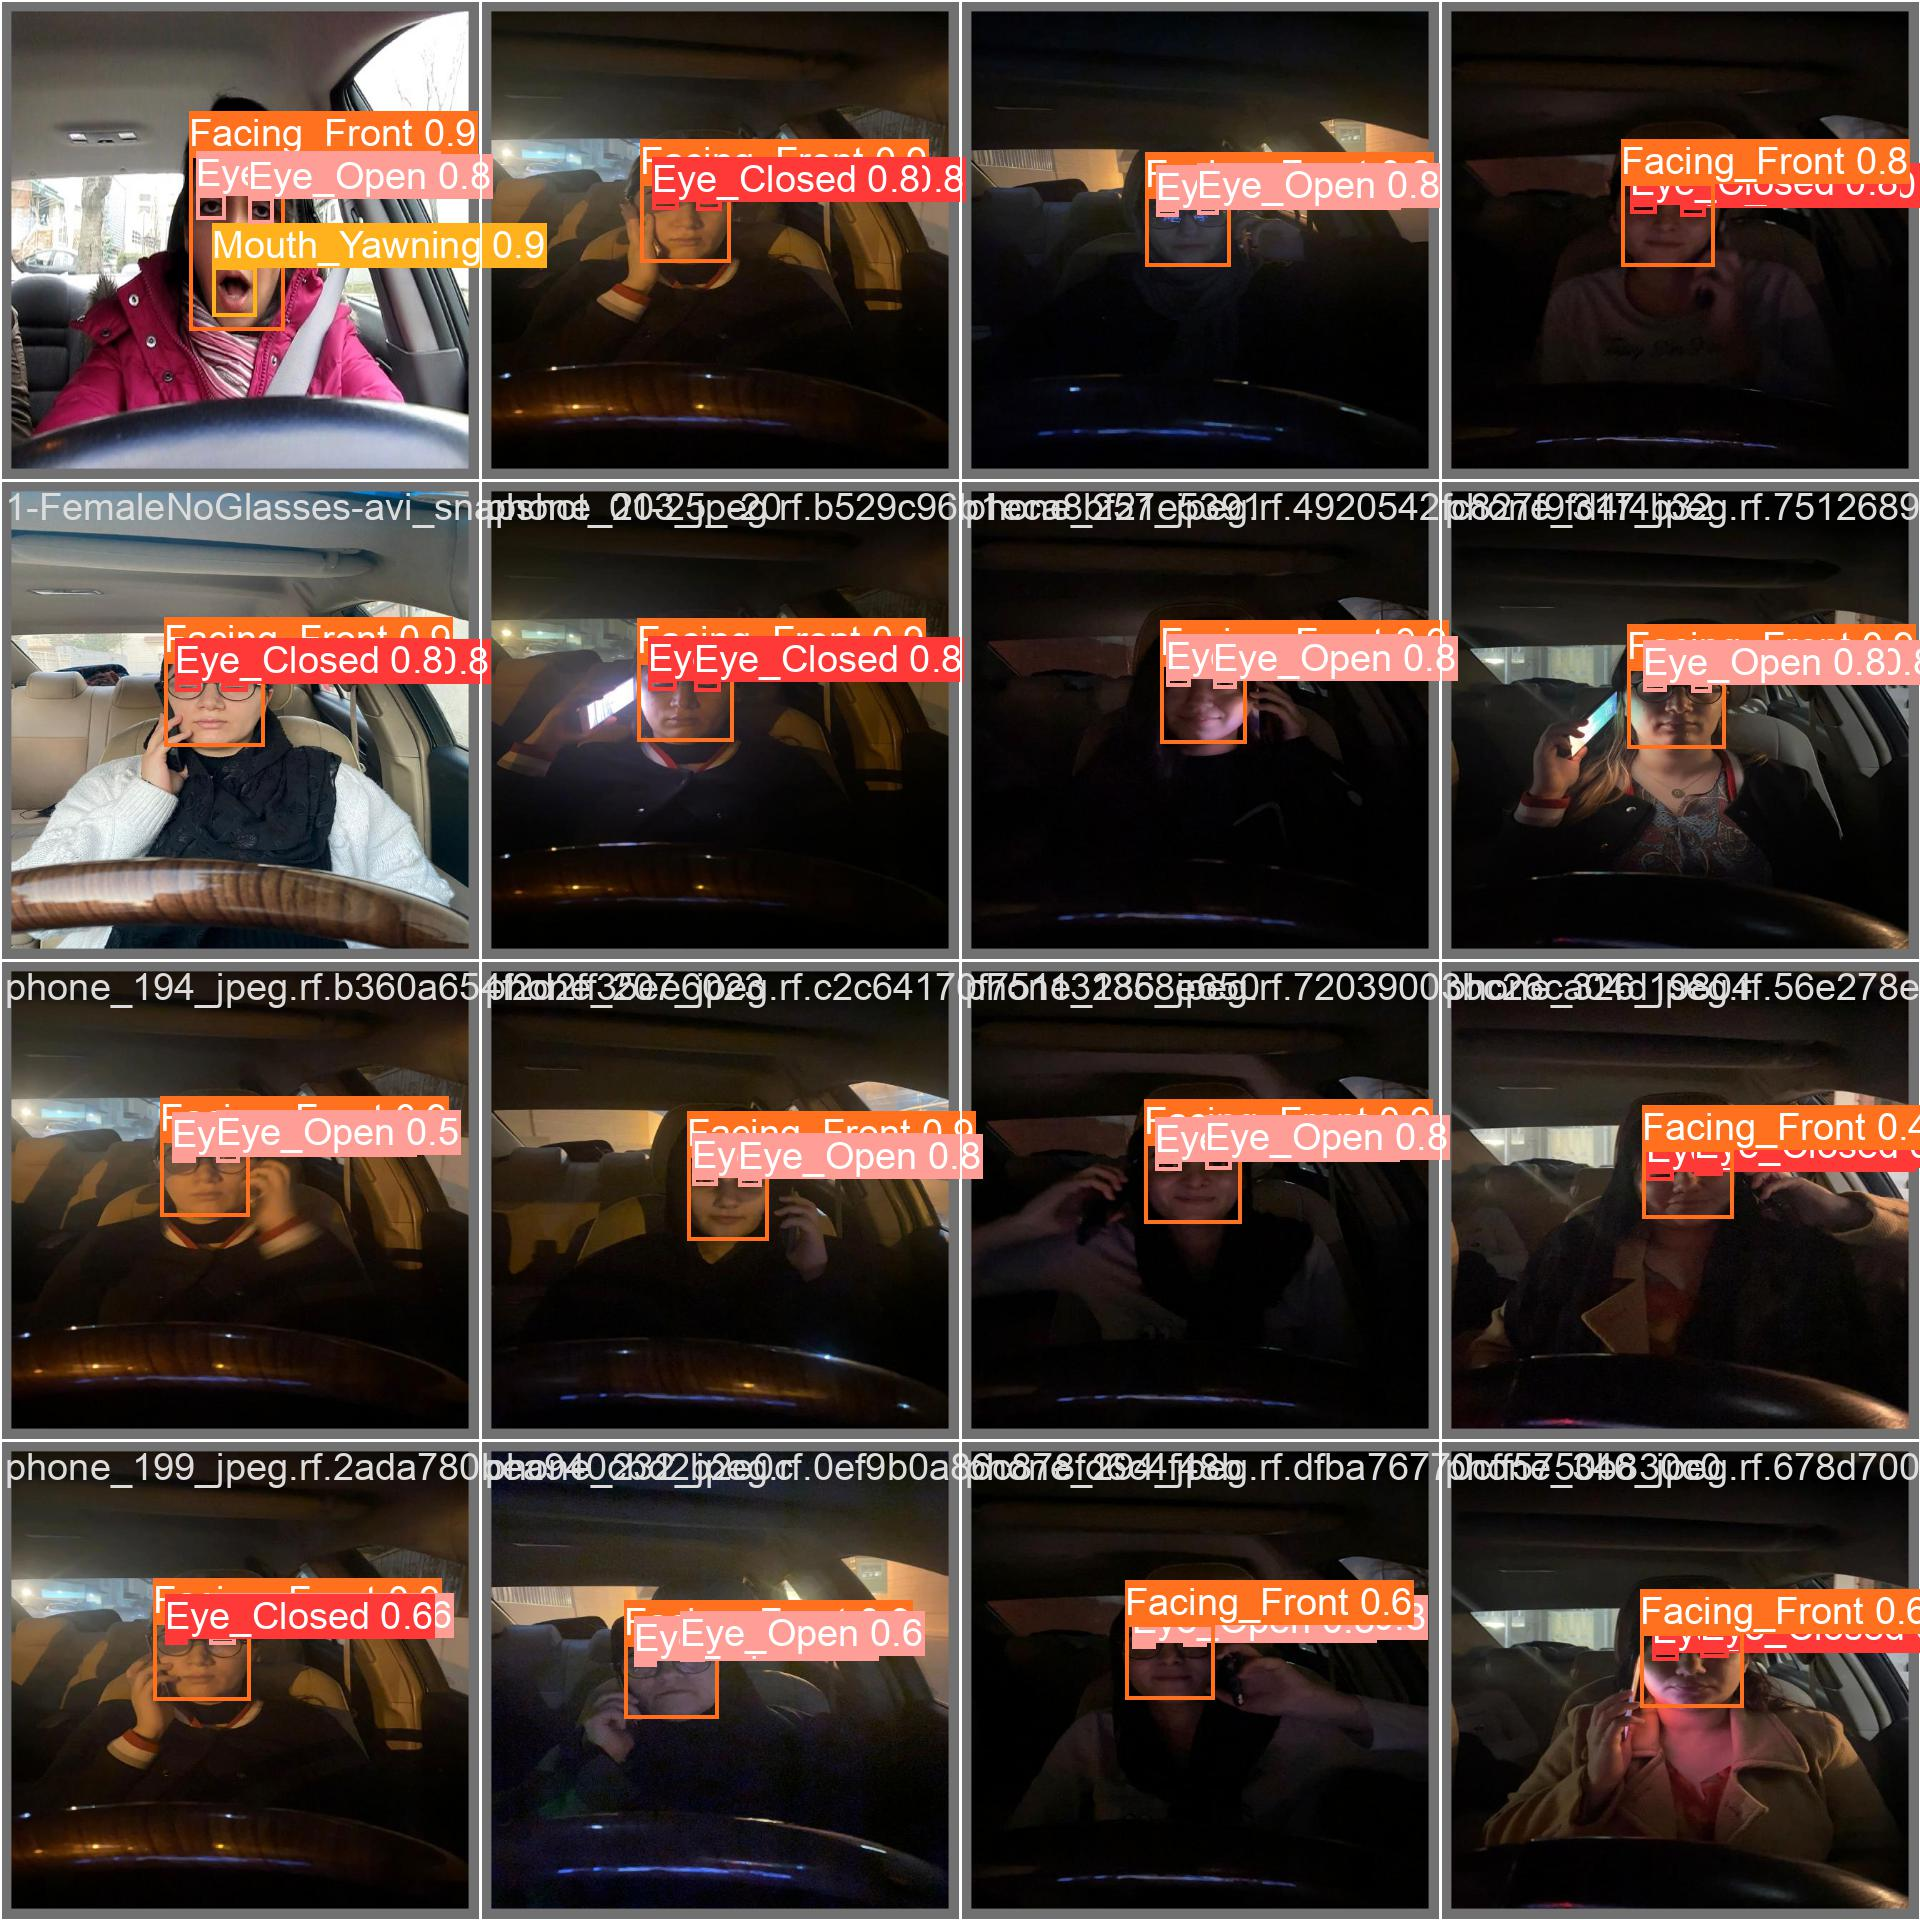

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train14/weights/best.pt data={dataset.location}/data.yaml

/content/gdrive/MyDrive/DriveSafe-YOLOv8
2023-05-27 22:57:49.345875: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-27 22:57:49.397667: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 22:57:50.305416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdriv